In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import scipy
import statsmodels.api as sm

In [3]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import scipy
import statsmodels.api as sm

In [4]:
# Data
df_train = pd.read_csv("CMaps/train_FD001.txt", sep=" ", header=None)
df_test = pd.read_csv("CMaps/test_FD001.txt", sep=" ", header=None)
df_rul = pd.read_csv("CMaps/RUL_FD001.txt", sep=" ", header=None)

In [5]:
print(f"Train: {df_train.shape}")
print(f"Test: {df_test.shape}")
print(f"RUL: {df_rul.shape}")

Train: (20631, 28)
Test: (13096, 28)
RUL: (100, 2)


In [6]:
columns = ['Engine_ID', 'Cycle',
          'ALT', 'Mach', 'TRA',
          'T2', 'T24', 'T30', 'T50',
           'P2', 'P15', 'P30',
           'Nf', 'Nc', 'epr', 'Ps30', 'phi',
           'NRf', 'NRc', 'BPR', 'farB',
           'htBleed', 'Nf_dmd', 'PCNfR_dmd',
           'W31', 'W32', "SD_22", "SD_23"
          ]

In [7]:
df_train.columns = columns
df_test.columns = columns

In [8]:
# Count number of unique engines
print(f"df_train unique engines: {df_train['Engine_ID'].nunique()}")
print(f"df_test unique engines: {df_test['Engine_ID'].nunique()}")

df_train unique engines: 100
df_test unique engines: 100


In [9]:
print(f"df_rul engines count: {len(df_rul)}")

df_rul engines count: 100


In [10]:
#function for preparing training data and forming a RUL column with information about the remaining
# before breaking cycles
def prepare_train_data(data, factor = 0):
    df = data.copy()
    fd_RUL = df.groupby('Engine_ID')['Cycle'].max().reset_index()
    fd_RUL = pd.DataFrame(fd_RUL)
    fd_RUL.columns = ['Engine_ID','max']
    df = df.merge(fd_RUL, on=['Engine_ID'], how='left')
    df['RUL'] = df['max'] - df['Cycle']
    df.drop(columns=['max'],inplace = True)
    
    return df[df['Cycle'] > factor]

In [11]:
df_train = prepare_train_data(df_train, factor = 0)

In [12]:
display(df_train)

,Engine_ID,Cycle,ALT,Mach,TRA,T2,T24,T30,T50,P2,...,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32,SD_22,SD_23,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,8.4956,0.03,397,2388,100.0,38.49,22.9735,NaN,NaN,4
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,8.5139,0.03,395,2388,100.0,38.30,23.1594,NaN,NaN,3
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,8.5646,0.03,398,2388,100.0,38.44,22.9333,NaN,NaN,2
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,8.5389,0.03,395,2388,100.0,38.29,23.0640,NaN,NaN,1


In [13]:
# Add RUL to df_test

df_test = df_test.groupby('Engine_ID').last().reset_index()
print(len(df_test))

# Add max RUL to df_test
# Make list of df_rul
max_rul = df_rul[0].tolist() #len = 100

# Create actual RUL column: MAX_RUL - Cycle
df_test["RUL"] = max_rul

100


In [14]:
display(df_test)

,Engine_ID,Cycle,ALT,Mach,TRA,T2,T24,T30,T50,P2,...,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32,SD_22,SD_23,RUL
0,1,31,-0.0006,0.0004,100.0,518.67,642.58,1581.22,1398.91,14.62,...,8.4024,0.03,393,2388,100.0,38.81,23.3552,NaN,NaN,112
1,2,49,0.0018,-0.0001,100.0,518.67,642.55,1586.59,1410.83,14.62,...,8.4505,0.03,391,2388,100.0,38.81,23.2618,NaN,NaN,98
2,3,126,-0.0016,0.0004,100.0,518.67,642.88,1589.75,1418.89,14.62,...,8.4119,0.03,395,2388,100.0,38.93,23.2740,NaN,NaN,69
3,4,106,0.0012,0.0004,100.0,518.67,642.78,1594.53,1406.88,14.62,...,8.4634,0.03,395,2388,100.0,38.58,23.2581,NaN,NaN,82
4,5,98,-0.0013,-0.0004,100.0,518.67,642.27,1589.94,1419.36,14.62,...,8.4362,0.03,394,2388,100.0,38.75,23.4117,NaN,NaN,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,97,-0.0006,0.0003,100.0,518.67,642.30,1590.88,1397.94,14.62,...,8.4110,0.03,391,2388,100.0,38.96,23.4606,NaN,NaN,137
96,97,134,0.0013,-0.0001,100.0,518.67,642.59,1582.96,1410.92,14.62,...,8.4500,0.03,395,2388,100.0,38.61,23.2953,NaN,NaN,82
97,98,121,0.0017,0.0001,100.0,518.67,642.68,1599.51,1415.47,14.62,...,8.4235,0.03,394,2388,100.0,38.76,23.3608,NaN,NaN,59
98,99,97,0.0047,-0.0000,100.0,518.67,642.00,1585.03,1397.98,14.62,...,8.4003,0.03,391,2388,100.0,38.95,23.3595,NaN,NaN,117


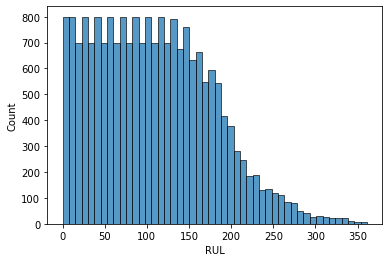

In [15]:
sns.histplot(data=df_train, x="RUL")

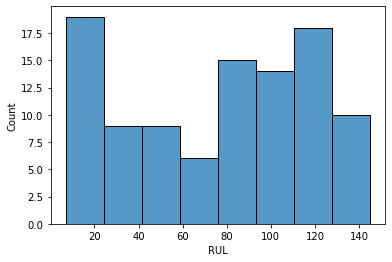

In [16]:
sns.histplot(data=df_test, x="RUL")

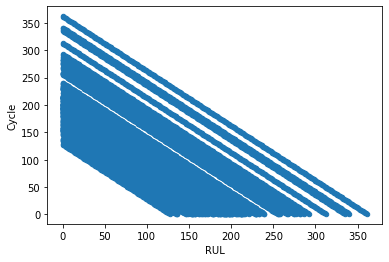

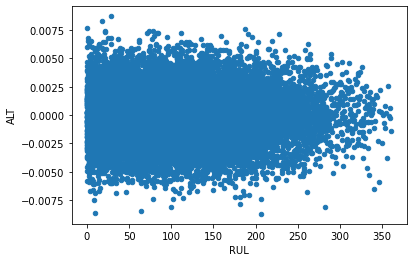

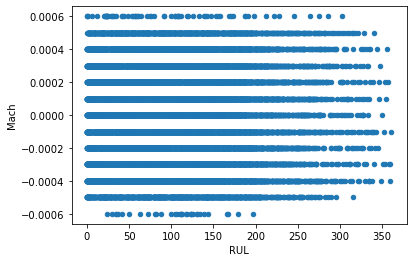

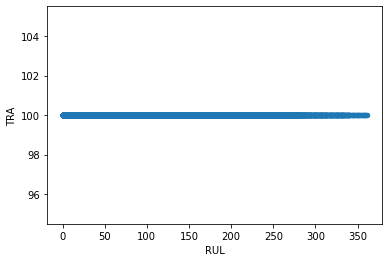

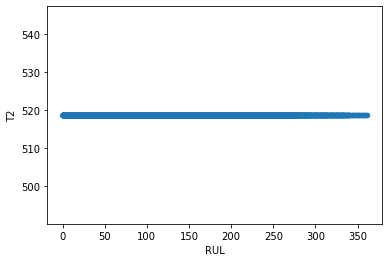

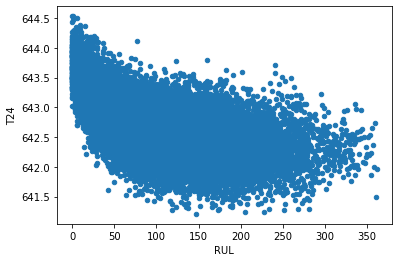

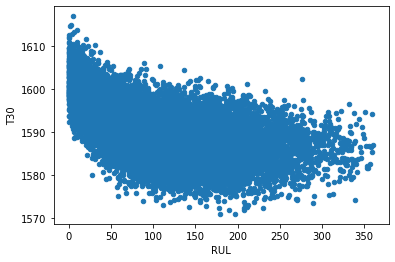

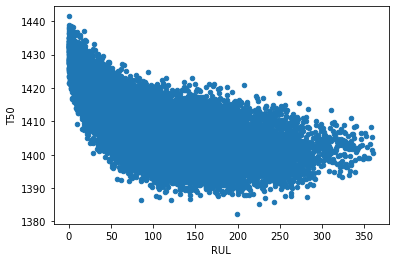

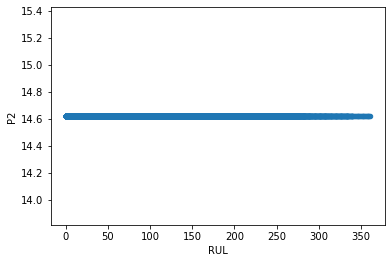

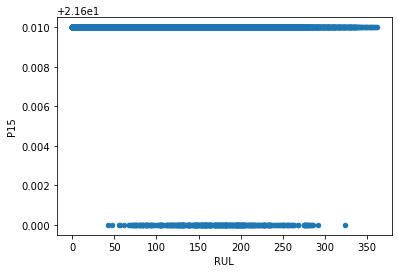

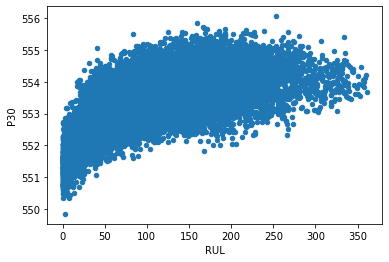

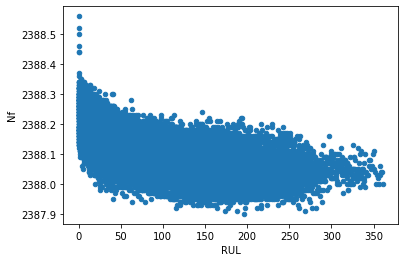

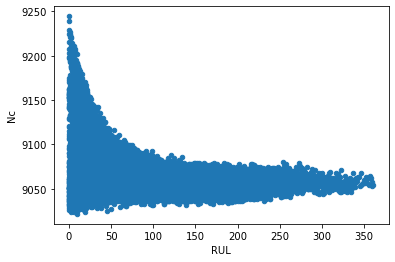

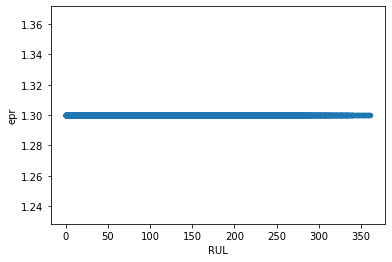

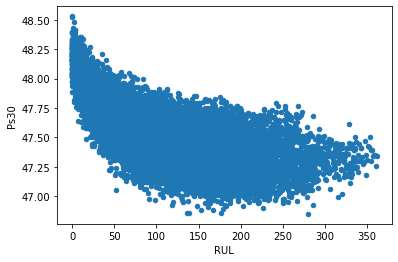

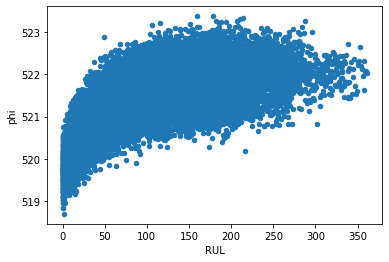

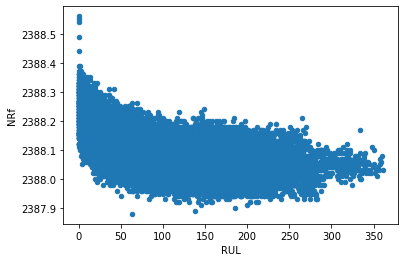

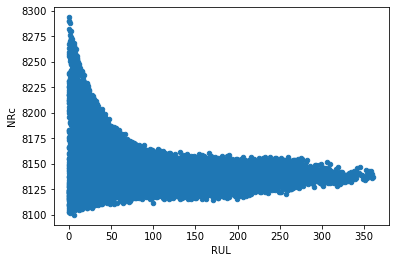

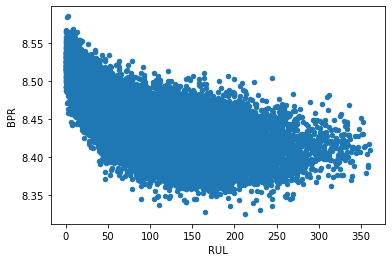

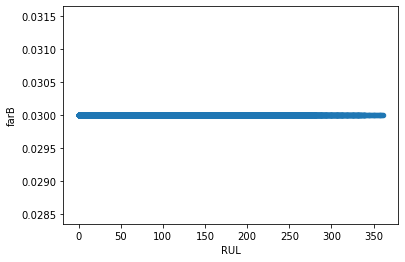

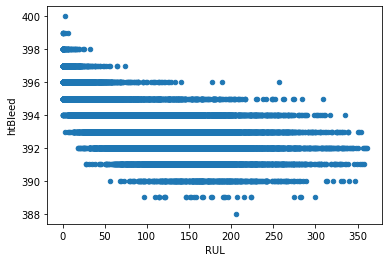

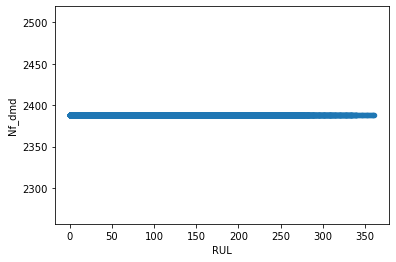

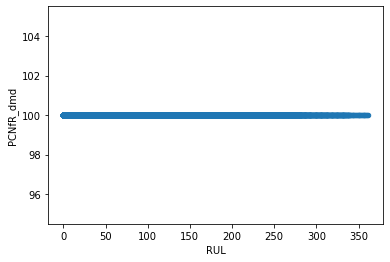

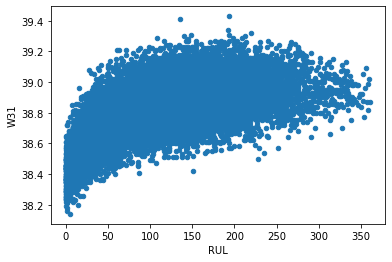

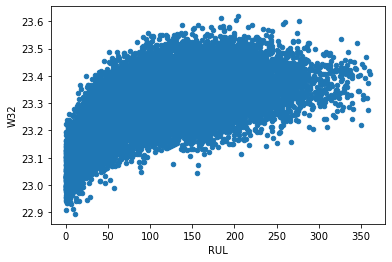

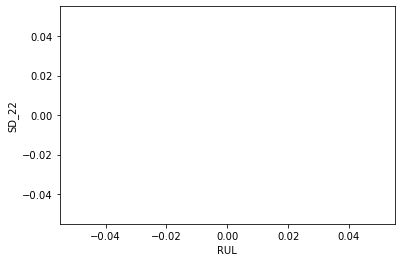

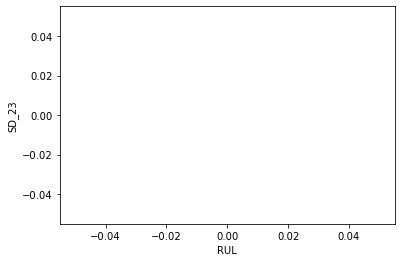

In [17]:
plt.rcParams.update({'figure.max_open_warning': 0})
for i in columns[1:]:
    #print(i)
    df_train.plot(x="RUL", y=i, kind="scatter")

In [18]:
# Remove columns from df_train and df_test

remove = ['TRA','T2','P2','epr','farB','Nf_dmd','PCNfR_dmd','SD_22','SD_23']
df_train.drop(columns=remove, axis=1, inplace=True)

In [19]:
display(df_train)

,Engine_ID,Cycle,ALT,Mach,T24,T30,T50,P15,P30,Nf,Nc,Ps30,phi,NRf,NRc,BPR,htBleed,W31,W32,RUL
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,21.61,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,191
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,21.61,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,190
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,21.61,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,189
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,21.61,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,21.61,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,643.49,1597.98,1428.63,21.61,551.43,2388.19,9065.52,48.07,519.49,2388.26,8137.60,8.4956,397,38.49,22.9735,4
20627,100,197,-0.0016,-0.0005,643.54,1604.50,1433.58,21.61,550.86,2388.23,9065.11,48.04,519.68,2388.22,8136.50,8.5139,395,38.30,23.1594,3
20628,100,198,0.0004,0.0000,643.42,1602.46,1428.18,21.61,550.94,2388.24,9065.90,48.09,520.01,2388.24,8141.05,8.5646,398,38.44,22.9333,2
20629,100,199,-0.0011,0.0003,643.23,1605.26,1426.53,21.61,550.68,2388.25,9073.72,48.39,519.67,2388.23,8139.29,8.5389,395,38.29,23.0640,1


In [20]:
df_train.columns

Index(['Engine_ID', 'Cycle', 'ALT', 'Mach', 'T24', 'T30', 'T50', 'P15', 'P30',
       'Nf', 'Nc', 'Ps30', 'phi', 'NRf', 'NRc', 'BPR', 'htBleed', 'W31', 'W32',
       'RUL'],
      dtype='object')

In [21]:
x_col = ['Engine_ID', 'Cycle', 'ALT', 'Mach', 'T24', 'T30', 'T50', 'P15', 'P30',
       'Nf', 'Nc', 'Ps30', 'phi', 'NRf', 'NRc', 'BPR', 'htBleed', 'W31', 'W32']
y_col = ['RUL']

df_X = df_train[x_col]
df_Y = df_train[y_col]

In [22]:
 # Split into training/testing sets with 25% split
X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, 
                                                    test_size = 0.25,
                                                    random_state=4103)

In [23]:
# Method 1 - Linear Regression
# Simple linear regression, very naive implementation.

In [24]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [25]:
# Metrics
predictions = lr.predict(X_test)
mae = np.mean(abs(predictions - y_test))
rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
print('Using Linear Regression, MAE is %0.2f' %  mae)  
print('Using Linear Regression, RMSE is %0.2f' %  rmse)   

Using Linear Regression, MAE is 30.33
Using Linear Regression, RMSE is 39.34


In [26]:
# Regression Analysis 
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est = est.fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                    RUL   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     1650.
Date:                Tue, 09 Feb 2021   Prob (F-statistic):               0.00
Time:                        19:22:12   Log-Likelihood:                -78903.
No. Observations:               15473   AIC:                         1.578e+05
Df Residuals:                   15453   BIC:                         1.580e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.256e+05   2.92e+04      4.301      0.0